In [1]:
import sys
import numpy as np
import pandas as pd
import xarray as xr

import warnings

warnings.filterwarnings("ignore")

import s2stools

# Open Files

In [2]:
# u60
print("u60...")
ds = s2stools.process.open_files(
    cf="_cf.nc",
    pf="_pf.nc",
    chc="_chc.nc",
    phc="_phc.nc",
    path_pattern="/project/meteo/work/Jonas.Spaeth/data/raw/s2s/ecmwf/u_10hpa_60/*2017*",
)
ds = ds.mean(["longitude", "latitude"]).rename(u="u60_10hpa")

u60...
realtime path:  /project/meteo/work/Jonas.Spaeth/data/raw/s2s/ecmwf/u_10hpa_60/*2017*_cf.nc
cf	 
pf	 
chc	 
phc	 


# Plot average ensemble standard deviation

In [3]:
u60_ensstd = ds.u60_10hpa.std("number")

dimensions:
```python
ds.u60_10hpa  # reftime, hc_year, number, leadtime
u60_ensstd  # reftime, hc_year, leadtime
u60_ensstd_stacked  # fc, leadtime
u60_ensstd_stacked.mean("fc")  # leadtime
```

In [4]:
u60_ensstd_stacked = s2stools.process.stack_ensfc(u60_ensstd)

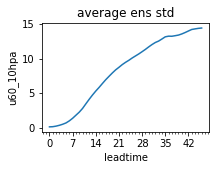

In [5]:
import s2stools.plot
import matplotlib.pyplot as plt

u60_ensstd_stacked.mean("fc").plot(size=2)

ax = plt.gca()
s2stools.plot.xaxis_unit_days(ax, multiple=7)
ax.set_title("average ens std")
plt.show()

# Events

In [6]:
ds_short = ds.isel(reftime=range(2), number=range(2))

## How to use EventComposite

In [7]:
# find ssw
event_list = s2stools.events.find_ssw(
    ds_short, buffer_start=0, buffer_end=0, require_westwind_start=1
)
event_list

number of:
	 all forecast combinations:  84
	 valid forecast combinations:  84
	 forecasts start start with 10 days westwind:  84


Scanning Forecasts for Events: 100%|██████████| 84/84 [00:14<00:00,  5.96it/s]


[{'fc': {'reftime': '2017-11-16', 'hc_year': -20, 'number': 0},
  'leadtime': 'P37DT0H0M0S'},
 {'fc': {'reftime': '2017-11-16', 'hc_year': -18, 'number': 1},
  'leadtime': 'P31DT0H0M0S'},
 {'fc': {'reftime': '2017-11-16', 'hc_year': -17, 'number': 0},
  'leadtime': 'P37DT0H0M0S'},
 {'fc': {'reftime': '2017-11-16', 'hc_year': -14, 'number': 0},
  'leadtime': 'P29DT0H0M0S'},
 {'fc': {'reftime': '2017-11-16', 'hc_year': -3, 'number': 1},
  'leadtime': 'P43DT0H0M0S'},
 {'fc': {'reftime': '2017-11-16', 'hc_year': -1, 'number': 0},
  'leadtime': 'P44DT0H0M0S'},
 {'fc': {'reftime': '2017-11-20', 'hc_year': -20, 'number': 0},
  'leadtime': 'P43DT0H0M0S'},
 {'fc': {'reftime': '2017-11-20', 'hc_year': -20, 'number': 1},
  'leadtime': 'P41DT0H0M0S'},
 {'fc': {'reftime': '2017-11-20', 'hc_year': -17, 'number': 1},
  'leadtime': 'P41DT0H0M0S'},
 {'fc': {'reftime': '2017-11-20', 'hc_year': -15, 'number': 1},
  'leadtime': 'P31DT0H0M0S'},
 {'fc': {'reftime': '2017-11-20', 'hc_year': -8, 'number': 0},

In [8]:
# create EventComposite
ec = s2stools.events.EventComposite(
    data=ds_short, events=event_list, descr="SSW", model="ecmwf"
)
ec

Opening Events: 100%|██████████| 14/14 [00:00<00:00, 320.46it/s]


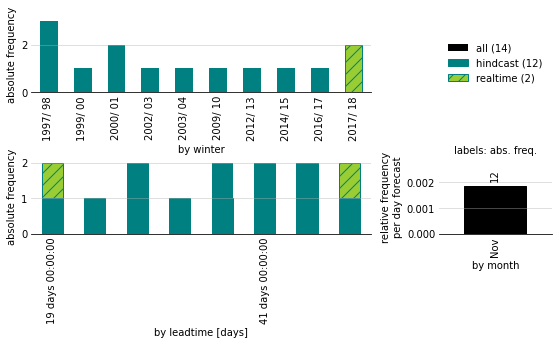

In [9]:
fig, ax = ec.plot_eventinfo()

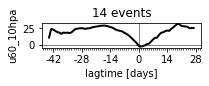

In [10]:
fig, ax = s2stools.plot.composite_overview(ec.comp)

In [11]:
ec.comp

<xarray.Dataset>
Dimensions:    (lagtime: 72, i: 14)
Coordinates:
  * lagtime    (lagtime) timedelta64[ns] -44 days -43 days ... 26 days 27 days
    number     (i) int64 0 1 0 0 1 0 0 1 1 1 0 0 0 1
    reftime    (i) datetime64[ns] 2017-11-16 2017-11-16 ... 2017-11-20
    hc_year    (i) int64 -20 -18 -17 -14 -3 -1 -20 -20 -17 -15 -8 -5 0 0
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
Data variables:
    u60_10hpa  (i, lagtime) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>

## How to use `threshold_exceedance_in_forecasts`

(requires 0.0.21 or newer)
leadtime_start, leadtime_end correspond to indices, not timedeltas (should be updated in future version)

In [12]:
events = s2stools.events.threshold_exceedance_in_forecasts(
    ds_short.u60_10hpa, threshold=0, above=False, event_end_to_nan=True
    )
events

,reftime,hc_year,number,leadtime_start,leadtime_end,duration,maximum,minimum
0,2017-11-16 00:00:00,-20,0,37,38,1,-3.884552,-3.884552
1,2017-11-16 00:00:00,-18,1,31,34,3,-0.378813,-3.587073
2,2017-11-16 00:00:00,-17,0,37,40,3,-1.75638,-5.769656
3,2017-11-16 00:00:00,-14,0,29,30,1,-1.702011,-1.702011
4,2017-11-16 00:00:00,-3,1,43,NaN,NaN,-0.755517,-9.159878
5,2017-11-16 00:00:00,-1,0,44,NaN,NaN,-3.728249,-7.086323
6,2017-11-20 00:00:00,-20,0,43,44,1,-0.067732,-0.067732
7,2017-11-20 00:00:00,-20,1,41,43,2,-0.871658,-1.50039
8,2017-11-20 00:00:00,-17,1,41,NaN,NaN,-0.570468,-12.985223
9,2017-11-20 00:00:00,-15,1,31,35,4,-0.185865,-2.495784


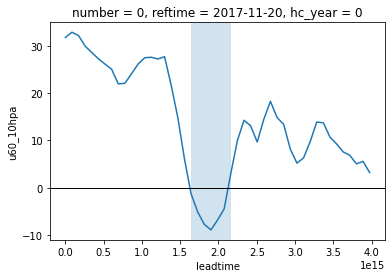

In [13]:
sample_event = events.loc[12]
ds_short.sel(reftime=sample_event["reftime"]).sel(
    hc_year=sample_event["hc_year"], number=sample_event["number"]
    ).u60_10hpa.plot()
start = float(pd.Timedelta(sample_event["leadtime_start"], "days").asm8)
end = float(pd.Timedelta(sample_event["leadtime_end"], "days").asm8)
plt.axvspan(start, end, alpha=.2)
plt.axhline(0, c="k", lw=1)
plt.show()

---

In [ ]:
xr.apply_ufunc(
    s2stools.events.threshold_exceedance_in_forecasts, ds_short.u60_10hpa, threshold=0, above=False,
    event_end_to_nan=True
    ))